## Project Overview
The objective of this project is to explore and analyze how customers sentiment have been changed throughout time. with the use of sentiment analysis algorithms like VADER and BERT

## Table of contents

0. Introduction
    1. Purpose of the project
    2. Main assumptions
1. Installing required packages
2. Dataset
    1. Dataset Collection
    2. Preprocessing
    3. Exploratory Data Analysis (EDA)
3. Lexicon-Based Sentiment Analysis
	1. Vader Sentiment Distribution
	2. Positive wordcloud
	3. Negative wordcloud
	4. Evaluating VADER's prediction
	5. VADER is a VALENCE based Sentiment Analysis Summary
4. Supervised Machine Learning Approach
    1. Traing, Validation and Test dataset spliting
5. Comparison of Methods
    1. Overall Comparison of Sentiment Analysis Summary using both methods
    2. Conclusion

## 0. Introduction
### 0.1. Purpose of the project.
Provide a concise introduction to sentiment analysis of airline customers using lexicon-based (VADER) and supervised learning (BERT) algorithms and compare the results. Include visualizations and summary statistics to understand the distribution of sentiments (positive, negative, neutral).

### 0.2. Main assumptions
- BERT Model is better than VADER.
- How have sentiment emerged, evolved, or declined over time?

In [1]:
# Uncomments the following code to install the necessary packages

# !pip install --upgrade pip
# !pip install skimpy
# !pip install wordcloud
# !pip install pandas numpy matplotlib seaborn scikit-learn vaderSentiment textblob transformers torch

# !pip install transformers['torch']
# !pip install 'accelerate>=0.26.0'


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from skimpy import skim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud #, STOPWORDS

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chandp20/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandp20/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Dataset

### 2.1. Dataset Collection

Data Source:
In this sentiment analysis project I used the huggingface [twitter-airline-sentiment](https://huggingface.co/datasets/osanseviero/twitter-airline-sentiment) dataset. \
Download Link: [Twitter Airline Sentiment](https://huggingface.co/datasets/osanseviero/twitter-airline-sentiment)

In [4]:
df = pd.read_csv("hf://datasets/osanseviero/twitter-airline-sentiment/Tweets.csv")

/Users/chandp20/Library/Caches/pypoetry/virtualenvs/sentiment-analysis-IquNjD9O-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df.shape

(14640, 15)

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 2.2. Processing

In [7]:
df['tweet_created_date'] = pd.to_datetime(df['tweet_created']).dt.date

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_created_date
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015-02-24


In [9]:
df['tweet_created_date'].unique()

array([datetime.date(2015, 2, 24), datetime.date(2015, 2, 23),
       datetime.date(2015, 2, 22), datetime.date(2015, 2, 21),
       datetime.date(2015, 2, 20), datetime.date(2015, 2, 19),
       datetime.date(2015, 2, 18), datetime.date(2015, 2, 17),
       datetime.date(2015, 2, 16)], dtype=object)

In [10]:
sentiment_df = df[['airline_sentiment', 'airline','text', 'tweet_created_date']]

In [11]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24


### 2.3. Exploratory Data Analysis (EDA)
- Include visualizations and summary statistics to understand the distribution of sentiments (positive, negative, neutral).

In [12]:
#Summary of the original dataset
skim(sentiment_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14640  │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ object      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                            <class 'datetime.date'>                                              │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column                         ┃ NA    ┃ NA %     ┃ first             ┃ last              ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ tweet_created_date             │     0 │        0 │ 2015-02-16        │ 2015-02-24        │ None           │  │
│ └────────────────────────────────┴───────┴──────────┴───────────────────┴───────────────────┴────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ airline_s │  0 │    0 │ neutral   │ positive  │ negative  │ positive  │      7.79 │         1 │      14640 │  │
│ │ entiment  │    │      │           │           │           │           │           │           │            │  │
│ │ airline   │  0 │    0 │ Delta     │ Virgin    │ American  │ Virgin    │      7.79 │       1.2 │      18057 │  │
│ │           │    │      │           │ America   │           │ America   │           │           │            │  │
│ │ text      │  0 │    0 │ @united   │ @USAirway │ "LOL you  │ 😳        │       104 │        18 │     260526 │  │
│ │           │    │      │ done      │ s Eyyyy!  │ guys are  │ LOLOLOLOL │           │           │            │  │
│ │           │    │      │           │ Cancelled │ so on it" │ OL        │           │           │            │  │
│ │           │    │      │           │ Flightlat │ - me, had │ “@JetBlue │           │           │            │  │
│ │           │    │      │           │ ions,     │ this been │ : Our     │           │           │            │  │
│ │           │    │      │           │ Flight    │ 4 months  │ fleet's   │           │           │            │  │
│ │           │    │      │           │ Booking   │ ago...“@J │ on fleek. │           │           │            │  │
│ │           │    │      │           │ Problemss │ etBlue:   │ http://t. │           │           │            │  │
│ │           │    │      │           │ ,         │ Our       │ co/YXSwFq │           │           │            │  │
│ │           │    │      │           │ reFlight  │ fleet's   │ 9tGP”     │           │           │            │  │
│ │           │    │      │           │ Booking   │ on fleek. │           │           │           │            │  │
│ │           │    │      │           │ Problemss │ http:

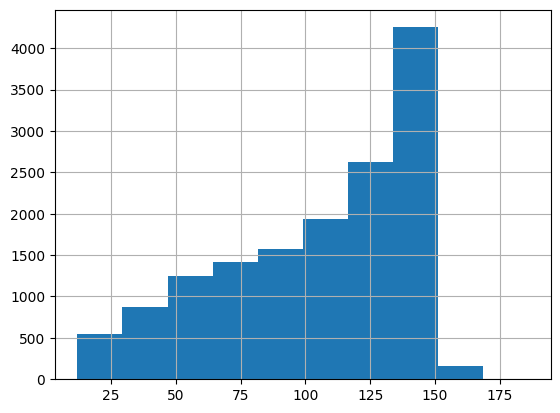

In [13]:
sentiment_df['text'].map(lambda x: len(x)).hist()
plt.show()

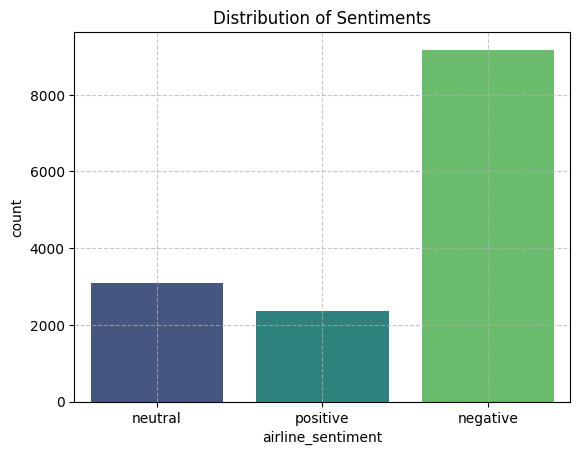

In [14]:
# EDA: Distribution of sentiments
sns.countplot(x='airline_sentiment', data=sentiment_df, palette="viridis")
plt.title('Distribution of Sentiments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

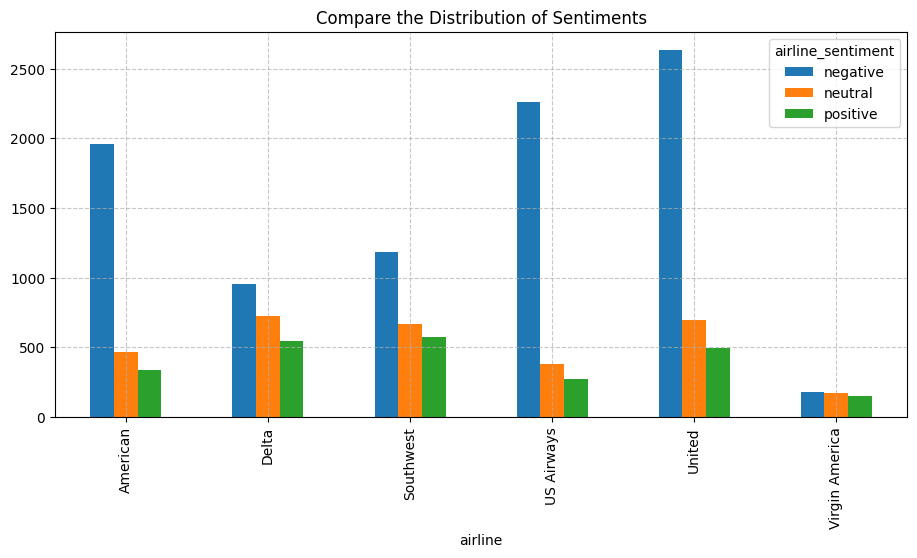

In [15]:
# compare the airlines
sentiment_df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))
plt.title('Compare the Distribution of Sentiments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the sentiment distribution (negative, neutral, positive) among various airlines in the Twitter Airline Sentiment dataset:

- **Negative Sentiment (blue)** dominates across all airlines, especially for United and American, which have the highest volume of negative tweets.
- **Neutral Sentiment (orange)** is modest and relatively stable among airlines.
- **Positive Sentiment (green)** is the lowest among all airlines, with Virgin America showing a little higher volume of positive tweets compared to its competitors.

This highlights an ongoing pattern of frustration, that includes significant variations in sentiment intensity among airlines.

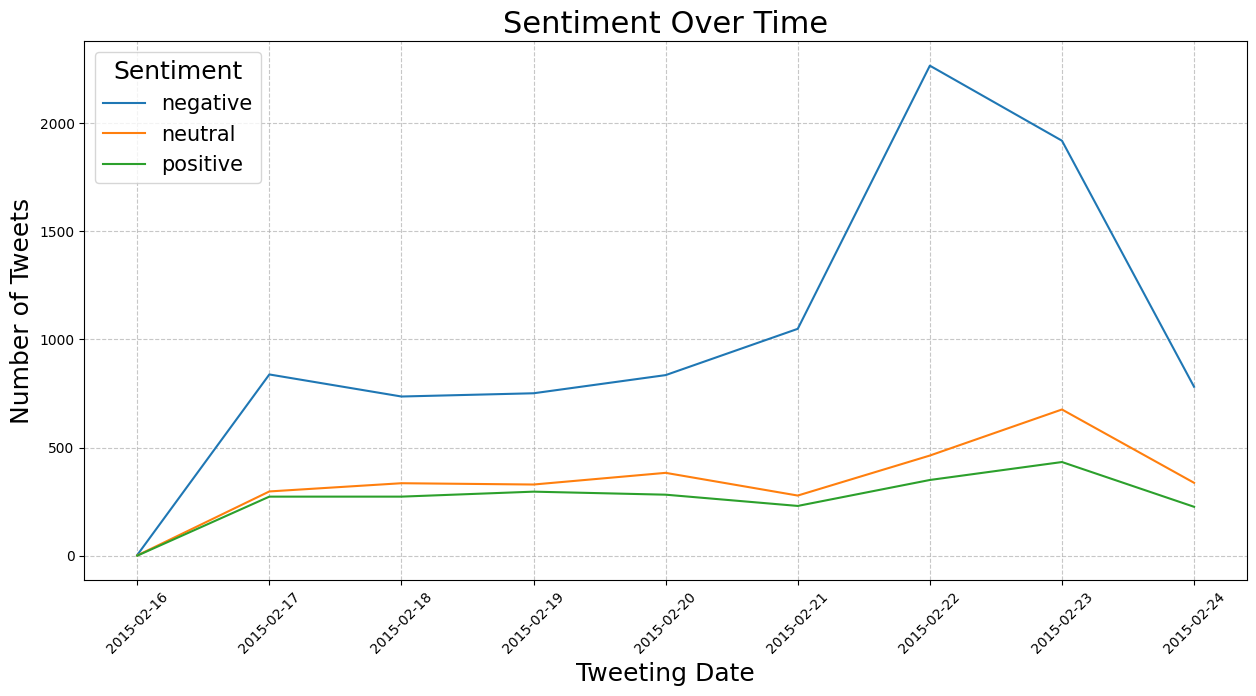

In [16]:
# Group by tweet_created_date and airline_sentiment
sentiment_over_time = sentiment_df.groupby(['tweet_created_date', 'airline_sentiment']).size().unstack().fillna(0)

# Plot the sentiment over time
sentiment_over_time.plot(kind='line', figsize=(15, 7))
plt.title('Sentiment Over Time', fontsize=22)
plt.xlabel('Tweeting Date', fontsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=15, title_fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This line chart shows the temporal distribution of sentiment (negative, neutral, positive) within the Twitter Airline Sentiment dataset. Key observations include:  

1. **Negative sentiment** dominates across the period of time, with a significant peak on 2015-02-22, signifying an increase in complaints or dissatisfaction.  
1. **Neutral sentiment** stays rather stable, with a modest increase during the same period.
1. **Positive sentiment** shows minimal activity, with a small increase seen between February 22 and February 23, 2015, however it stays continuously low.

The chart shows an evident tendency towards negative feedback over this timeframe, with significant peaks maybe associated with particular events or situations.

In [17]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'RT\S+', '', text)  # Remove URLs
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

In [18]:
# Apply the clean_text function to the 'text' column
# sentiment_df['cleaned_text'] = sentiment_df['text'].apply(clean_text)
sentiment_df.loc[:, 'cleaned_text'] = sentiment_df['text'].apply(clean_text)

/var/folders/n8/zv0wkckj2yj0wtbp49j0czh40000gp/T/ipykernel_38568/924746823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.loc[:, 'cleaned_text'] = sentiment_df['text'].apply(clean_text)


In [19]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,what said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus you ve added commercials to the experien...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,i didn t today must mean i need to take anoth...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,it s really aggressive to blast obnoxious ent...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,and it s a really big bad thing about it


In [20]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
sentiment_df.loc[:, 'cleaned_text'] = sentiment_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [21]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing


## 3. Lexicon-Based Sentiment Analysis

Apply the lexicon-based (VADER) method to the dataset to predict customers sentiment.

In [22]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    # To calulate the time it takes the algorithm to compute a VADER score
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [23]:
sentiment_df.loc[:, 'vader_score'] = sentiment_df['cleaned_text'].apply(vader_sentiment)

/var/folders/n8/zv0wkckj2yj0wtbp49j0czh40000gp/T/ipykernel_38568/3831806253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.loc[:, 'vader_score'] = sentiment_df['cleaned_text'].apply(vader_sentiment)


In [24]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said,0.0000
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky,0.0000
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip,0.0000
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...,-0.3306
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing,-0.5829


In [25]:
# assign score categories and logic
def vader_senti_predict(vader_score):
    if ((vader_score >= 0.58)):
        return 'positive'
    elif (vader_score > 0.3) & (vader_score < 0.58):
        return 'neutral'
    else:
        return 'negative'

In [26]:
# Making sure that sentiment_df is not a view
sentiment_df = sentiment_df.copy()
sentiment_df.loc[:, 'vader_senti_predict'] = sentiment_df['vader_score'].apply(vader_senti_predict)

In [27]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score,vader_senti_predict
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip,0.0000,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing,-0.5829,negative


### 3.1. Vader Sentiment Distribution

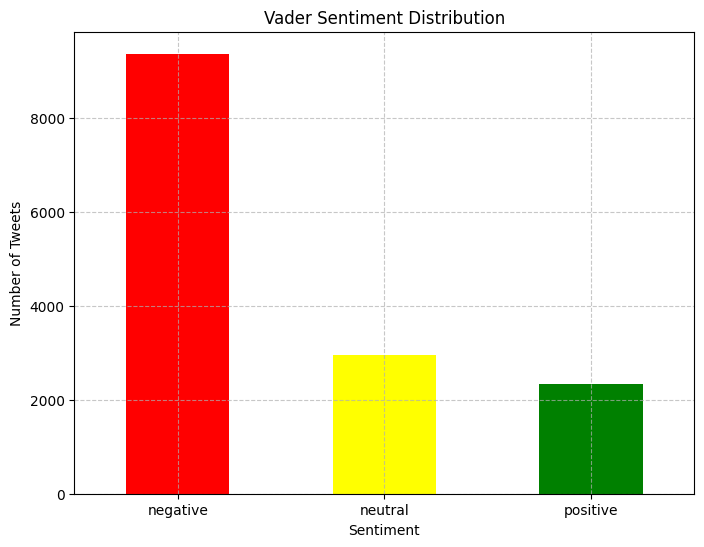

In [28]:
plt.figure(figsize=(8, 6))
sentiment_df.groupby('vader_senti_predict').size().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Vader Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The bar chart represents the sentiment distribution from the Twitter Airline Sentiment dataset analyzed using VADER. It shows that the majority of tweets (~8,000) are negative, reflecting significant dissatisfaction among customers. \
A smaller portion (~2,000) is neutral, likely representing objective or informational content, while the least (~1,500) are positive, indicating limited public praise for airlines. This highlights a predominantly negative perception of airlines on Twitter.

In [29]:
actual_sentiment_counts = sentiment_df['airline_sentiment'].value_counts()
actual_sentiment_counts

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [30]:
vader_sentiment_counts = sentiment_df['vader_senti_predict'].value_counts()
vader_sentiment_counts

vader_senti_predict
negative    9361
neutral     2950
positive    2329
Name: count, dtype: int64

### 3.2. Positive wordcloud

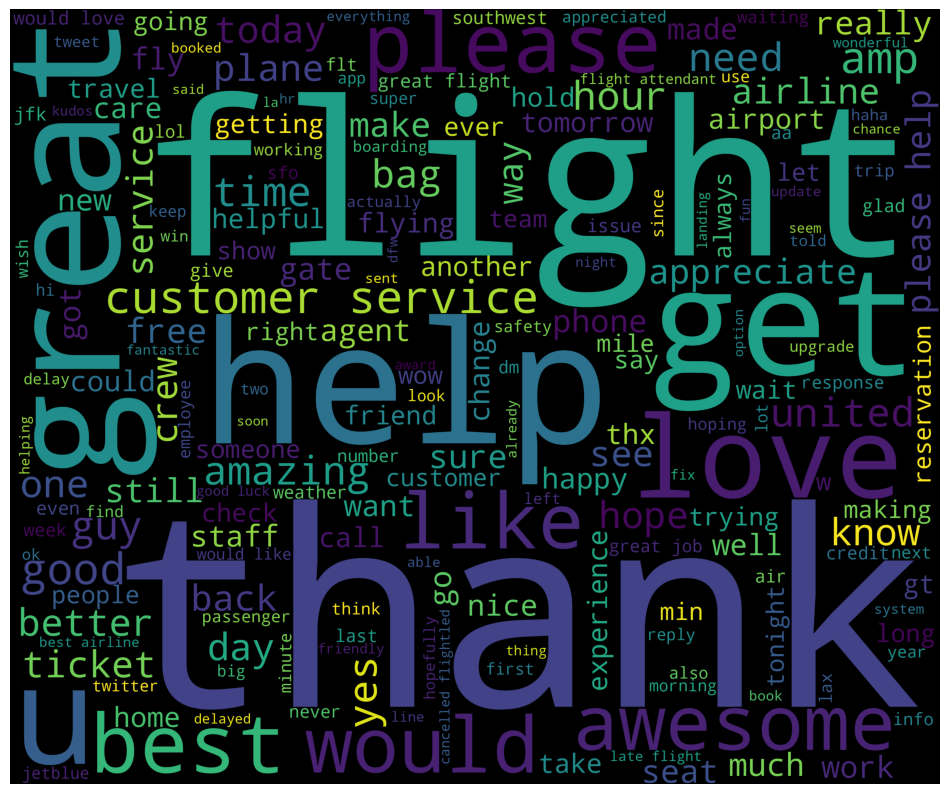

In [31]:
pos_df = sentiment_df[sentiment_df['vader_senti_predict']=='positive']

pos_cleaned_word = ' '.join(pos_df['cleaned_text'])

pos_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(pos_cleaned_word)


plt.figure(1, figsize=(12, 12))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

### 3.3. Negative wordcloud

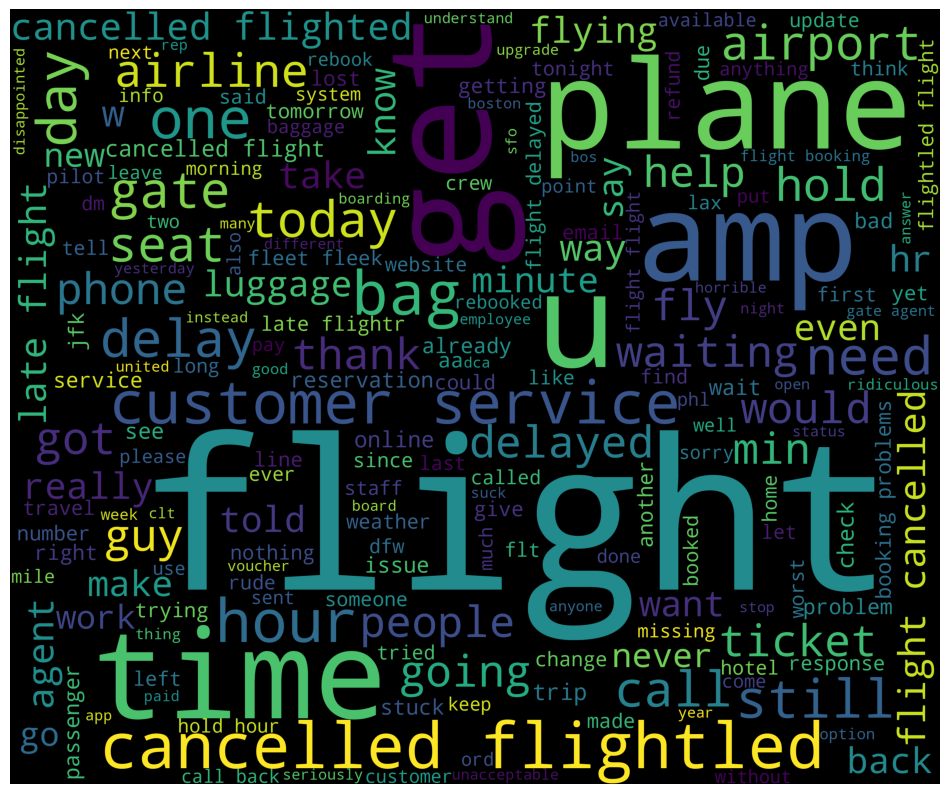

In [32]:
neg_df = sentiment_df[sentiment_df['vader_senti_predict']=='negative']

neg_cleaned_word = ' '.join(neg_df['cleaned_text'])

neg_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(neg_cleaned_word)


plt.figure(1, figsize=(12, 12))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

### 3.4. Evaluating VADER's prediction

 Compare results to labeled data using metrics like accuracy, precision, recall, and F1-score.

In [33]:
accuracy = accuracy_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'])
precision = precision_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')
recall = recall_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')
f1 = f1_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.60724043715847
Precision: 0.6016320833870709
Recall: 0.60724043715847
F1-score: 0.6043547462415132


**The model's performance on the sentiment prediction task is as follows:**

- **Accuracy**: The model correctly predicted the sentiment in approximately 60.7% of the cases.
- **Precision**: The weighted precision score is 60.2%, meaning that when the model predicted a positive sentiment, 60.2% of those predictions were correct.
- **Recall**: The model's recall score is 60.7%, indicating that it correctly identified 60.7% of the positive sentiments in the data.
- **F1-Score**: The F1-score is 60.4%, which balances precision and recall, suggesting a moderate performance in terms of both identifying positive sentiment and minimizing false positives.

Overall, the model demonstrates a moderate level of accuracy and performance across these metrics.

### 3.5. VADER is a VALENCE based Sentiment Analysis Summary
Based on the sentiment analysis performed using the VADER sentiment analysis tool on the tweets in the dataset, the distribution of sentiments is as follows:

**Sentiment Stats: Actual vs Vader Prediction**
| Sentiment     | Actual Tweets | Vader Predicted Tweets |
|---------------|---------------|-------------------------|
| Positive      | 2363          | 2339                   |
| Negative      | 9178          | 9352                   |
| Neutral       | 3099          | 2949                   |


**Summary:**

- Positive Sentiment: Vader predict 2339 tweets are positive while 2363 actually positive. These tweets express satisfaction, support, or other positive emotions. This indicates that a smaller portion of the tweets reflect positive opinions or sentiments.

- Negative Sentiment: The majority of the tweets 9352, Vader predicted as negative while actuall are 9178. This indicates a significant amount of dissatisfaction, criticism, or other negative emotions expressed by the users. This suggests that the topics discussed in these tweets are largely viewed unfavorably by the users.

- Neutral Sentiment: There are 2949 tweets classified as neutral by Vader but actual 3099 tweets are neutral. These tweets do not express a strong positive or negative sentiment. They might be factual statements, news updates, or other content that does not convey a clear opinion.

Conclusion: 

### **4. Supervised Machine Learning Approach**

- **Algorithm Selection**: Justify the choice of BERT algorithm.

### 4.1. Traing, Validation and Test dataset spliting

- **Training:** 70% of dataset used to training the model
- **Validation:** 20% of dataset used to validate the model
- **Test:** 10% of dataset used to test the model

In [34]:
# BERT implementation
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenization and dataset preparation
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

sentiment_df['label'] = sentiment_df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
train_texts, val_texts, train_labels, val_labels = train_test_split(sentiment_df['text'], sentiment_df['label'], test_size=0.2)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.10)

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

class AirlineDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = AirlineDataset(train_encodings, train_labels.tolist())
val_dataset = AirlineDataset(val_encodings, val_labels.tolist())
test_dataset = AirlineDataset(test_encodings, test_labels.tolist())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


- **Feature Extraction**:
  - Traditional Methods: Use Bag of Words (BoW) or TF-IDF.
  - Advanced Methods: Use word embeddings like Word2Vec, GloVe or BERT.

- **Model Training and Testing**:
  - Train the model on the dataset.
  - Perform hyperparameter tuning using methods like GridSearchCV or RandomizedSearchCV.

In [35]:
# Model training and evaluation code here
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
# )

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch instead of every few steps
    save_strategy="epoch",  # Save model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    fp16=False,  # Mixed precision
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,0.499700,0.402829
2,0.275600,0.425769
3,0.110700,0.566522


TrainOutput(global_step=1977, training_loss=0.3148900393017869, metrics={'train_runtime': 683.1646, 'train_samples_per_second': 46.285, 'train_steps_per_second': 2.894, 'total_flos': 1056205092688200.0, 'train_loss': 0.3148900393017869, 'epoch': 3.0})

### Evaluation
Report metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

### Training Metrics

In [36]:
train_predictions = trainer.predict(train_dataset)
train_preds = train_predictions.predictions.argmax(-1)

train_accuracy = accuracy_score(train_labels, train_preds)
train_precision = precision_score(train_labels, train_preds, average='weighted')
train_recall = recall_score(train_labels, train_preds, average='weighted')
train_f1 = f1_score(train_labels, train_preds, average='weighted')

print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1-score: {train_f1}')

Accuracy: 0.9019924098671727
Precision: 0.9007408665976626
Recall: 0.9019924098671727
F1-score: 0.8992059035667117


### Validation Metrics

In [37]:
val_predictions = trainer.predict(val_dataset)
val_preds = val_predictions.predictions.argmax(-1)

val_accuracy = accuracy_score(val_labels, val_preds)
val_precision = precision_score(val_labels, val_preds, average='weighted')
val_recall = recall_score(val_labels, val_preds, average='weighted')
val_f1 = f1_score(val_labels, val_preds, average='weighted')

print(f'Accuracy: {val_accuracy}')
print(f'Precision: {val_precision}')
print(f'Recall: {val_recall}')
print(f'F1-score: {val_f1}')

Accuracy: 0.8415300546448088
Precision: 0.837416483631053
Recall: 0.8415300546448088
F1-score: 0.8369190760678528


### Testing Metrics

In [38]:
test_predictions = trainer.predict(test_dataset)
test_preds = test_predictions.predictions.argmax(-1)

test_accuracy = accuracy_score(test_labels, test_preds)
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.60724043715847
Precision: 0.6016320833870709
Recall: 0.60724043715847
F1-score: 0.6043547462415132


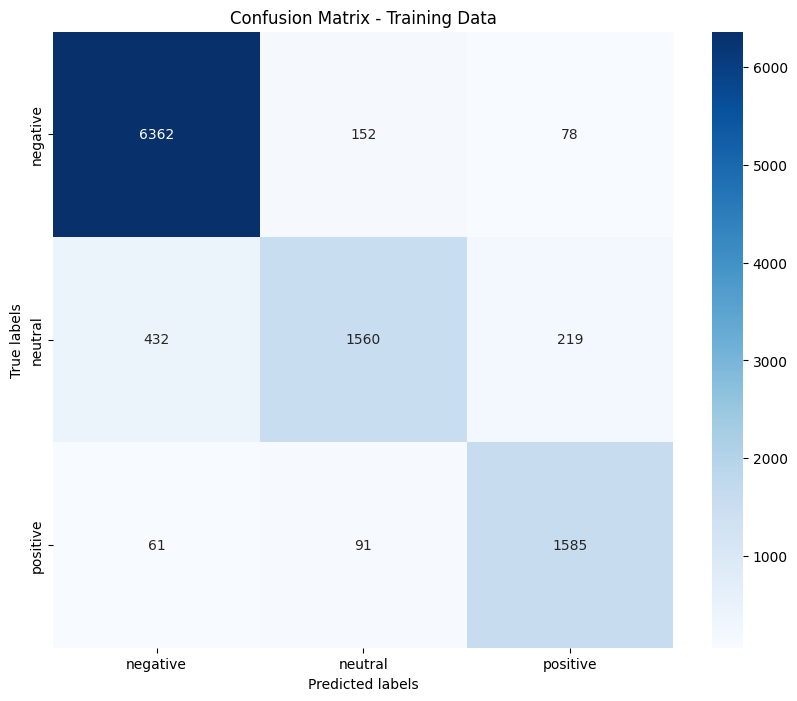

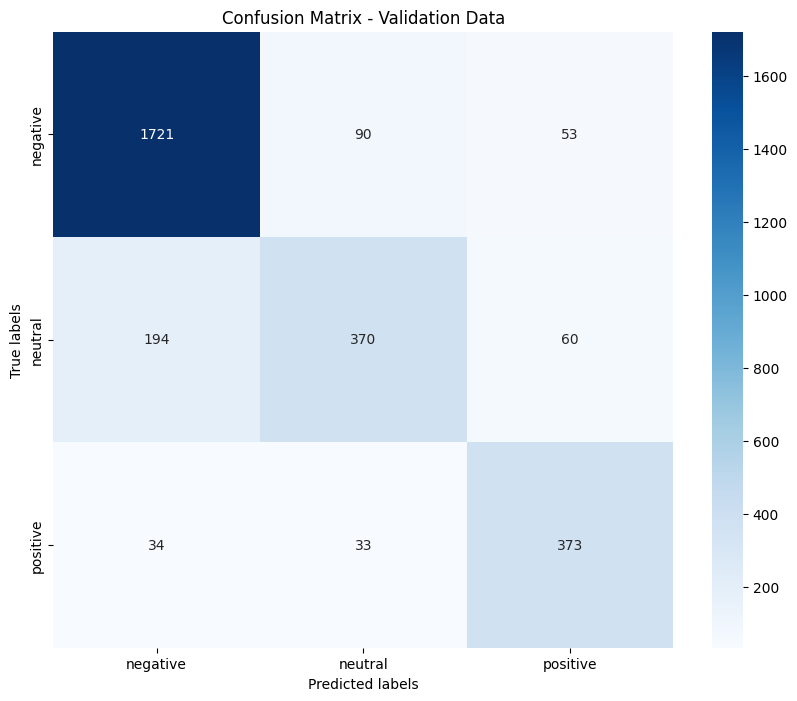

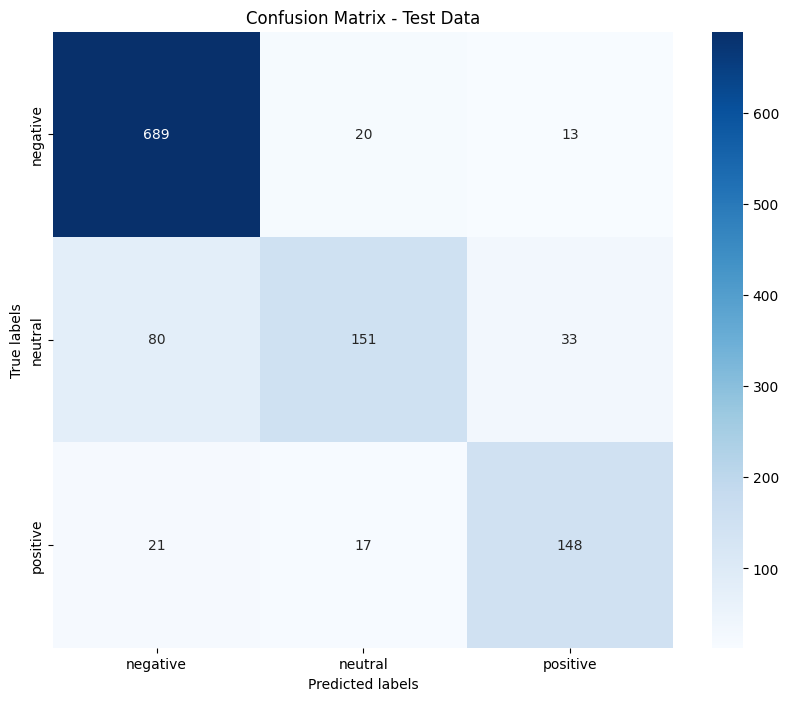

In [40]:
# Define class names
class_names = ['negative', 'neutral', 'positive']

# Confusion matrix for training dataset
cm_train = confusion_matrix(train_labels, train_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Data')
plt.show()

# Confusion matrix for validation dataset
cm_val = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Data')
plt.show()

# Confusion matrix for test dataset
cm_test = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

### Model Performance on Train, Validation, and Test Data

In [ ]:
# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the scores for each dataset (train, validation, test)
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
val_scores = [val_accuracy, val_precision, val_recall, val_f1]
test_scores = [accuracy, precision, recall, f1]

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars on the x-axis
x = range(len(metrics))

# Plot the bars for each dataset
width = 0.25  # Bar width
ax.bar(x, train_scores, width, label='Train', color='blue', alpha=0.7)
ax.bar([i + width for i in x], val_scores, width, label='Validation', color='green', alpha=0.7)
ax.bar([i + 2 * width for i in x], test_scores, width, label='Test', color='red', alpha=0.7)

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance on Train, Validation, and Test Data')

# Set the x-ticks to be in the middle of the bars
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(metrics)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## 5. Comparison of Methods

### 5.1. Overall Comparison of Sentiment Analysis Summary using both methods

The analysis demonstrates that while both VADER and BERT perform well in identifying the predominance of negative sentiment in the tweets dataset, BERT consistently achieves higher metrics (accuracy, precision, recall, and F1 score). This suggests that BERT provides a more robust approach to sentiment analysis compared to VADER, likely due to its deep learning architecture and contextual understanding.

However, to enhance the insights, clustering and topic modeling could be applied to uncover key themes within the dataset. Combining these methods with sentiment analysis would provide a richer understanding of the sentiment associated with each theme, offering deeper insights into the dataset's context and public opinion.

### 5.2. Conclusion

BERT outperforms VADER in sentiment analysis, showing higher accuracy, precision, recall, and F1 score. This indicates BERT's superior capability in capturing nuanced sentiment. However, the absence of target labels limits the analysis. Incorporating clustering or topic modeling could uncover themes and provide deeper sentiment insights for future studies.